In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("Boston.csv")
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
data.shape

(333, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [6]:
data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
X = data[['rm']]
y = data['medv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
single_model = LinearRegression()
single_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_single = single_model.predict(X_test)

print("Coefficient:", single_model.coef_)
print("Intercept:", single_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_single))
print("R2 Score:", r2_score(y_test, y_pred_single))

Coefficient: [8.58442449]
Intercept: -30.96185860010203
Mean Squared Error: 36.361622515889756
R2 Score: 0.5959747117709422


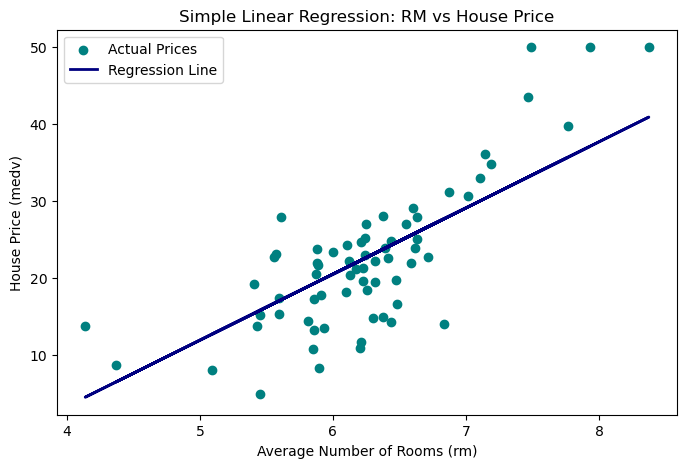

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='Teal', label='Actual Prices')
plt.plot(X_test, y_pred_single, color='Navy', linewidth=2, label='Regression Line')
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression: RM vs House Price")
plt.legend()
plt.show()

Coefficient: [-0.02316981]
Intercept: 32.25593991159057
Mean Squared Error: 67.47367565652733
R2 Score: 0.25027902033003224


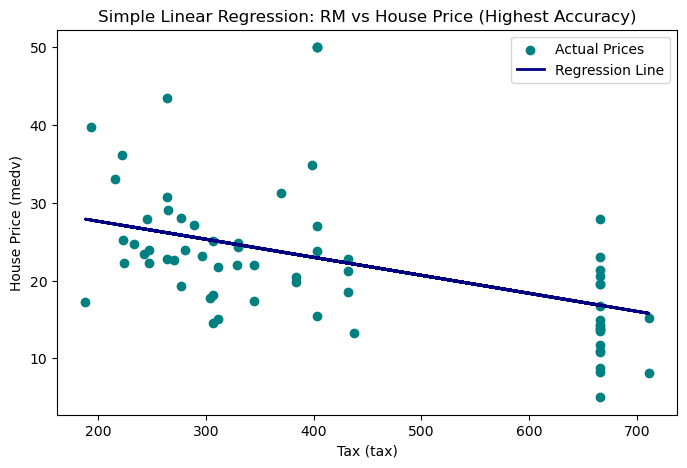

In [49]:
X_best = data[['tax']]
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(
    X_best, y, test_size=0.2, random_state=42
)

model_best = LinearRegression()
model_best.fit(X_train, y_train)

y_pred_best = model_best.predict(X_test)

print("Coefficient:", model_best.coef_)
print("Intercept:", model_best.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))
print("R2 Score:", r2_score(y_test, y_pred_best))

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='Teal', label='Actual Prices')
plt.plot(X_test, y_pred_best, color='Navy', linewidth=2, label='Regression Line')
plt.xlabel("Tax (tax)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression: RM vs House Price (Highest Accuracy)")
plt.legend()
plt.show()

In [13]:
X = data.drop('medv', axis=1)
y = data['medv']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

LinearRegression()

In [16]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multi_model.coef_
})

coefficients

,Feature,Coefficient
0,ID,-0.004902
1,crim,-0.070217
2,zn,0.061337
3,indus,-0.024444
4,chas,4.174129
5,nox,-14.787057
6,rm,3.397953
7,age,-0.014945
8,dis,-1.863079
9,rad,0.421680


In [17]:
y_pred_multi = multi_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred_multi))
print("R2 Score:", r2_score(y_test, y_pred_multi))

Mean Squared Error: 23.411701826598417
R2 Score: 0.7398653051224349


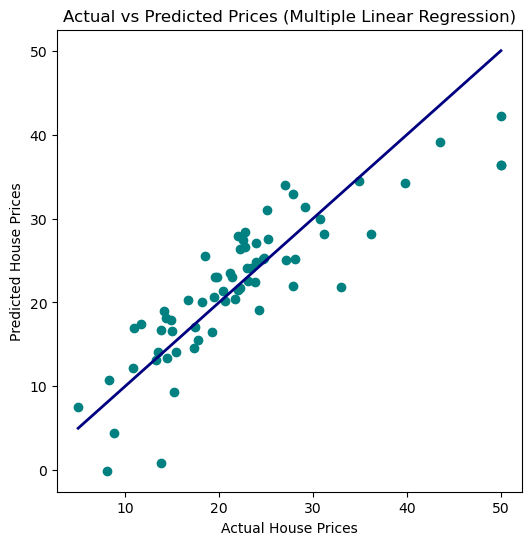

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_multi, color='Teal')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='Navy', linewidth=2)
plt.show()